# Zadania rozpoznawania

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def plot_cv2(image):
    plt.imshow(
        cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    )

plt.rcParams['figure.figsize'] = [16, 8]

### Proszę porównać metody Harrisa, SIFT, SURF, FAST i ORB w zadaniu rozpoznawania punktów charakterystycznych dla obrazu *lab5_2.png*. Dla której metody wyniki wydają się bliższe intuicji? Która wydaje się być bardziej „aplikowalna” (np. ze względu na czas obliczeń)?

Wymiary obrazu:  (924, 920, 3)


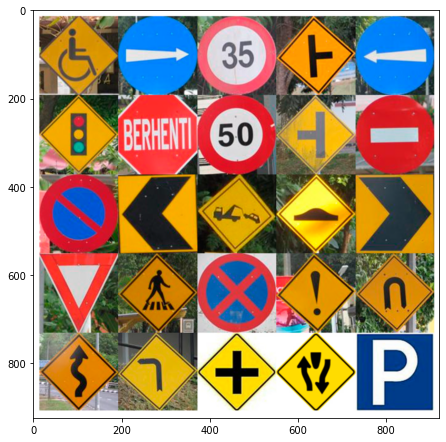

In [2]:
image = cv2.imread("lab5_2.png")
image_org = cv2.resize(
    image, 
    dsize = None, 
    fx = 0.5, 
    fy = 0.5,
)
image = image_org.copy()
print(f"Wymiary obrazu:  {image.shape}")
f = plt.figure()
ax = f.add_subplot(1, 2, 1)
plot_cv2(image)

#### metoda Harrisa

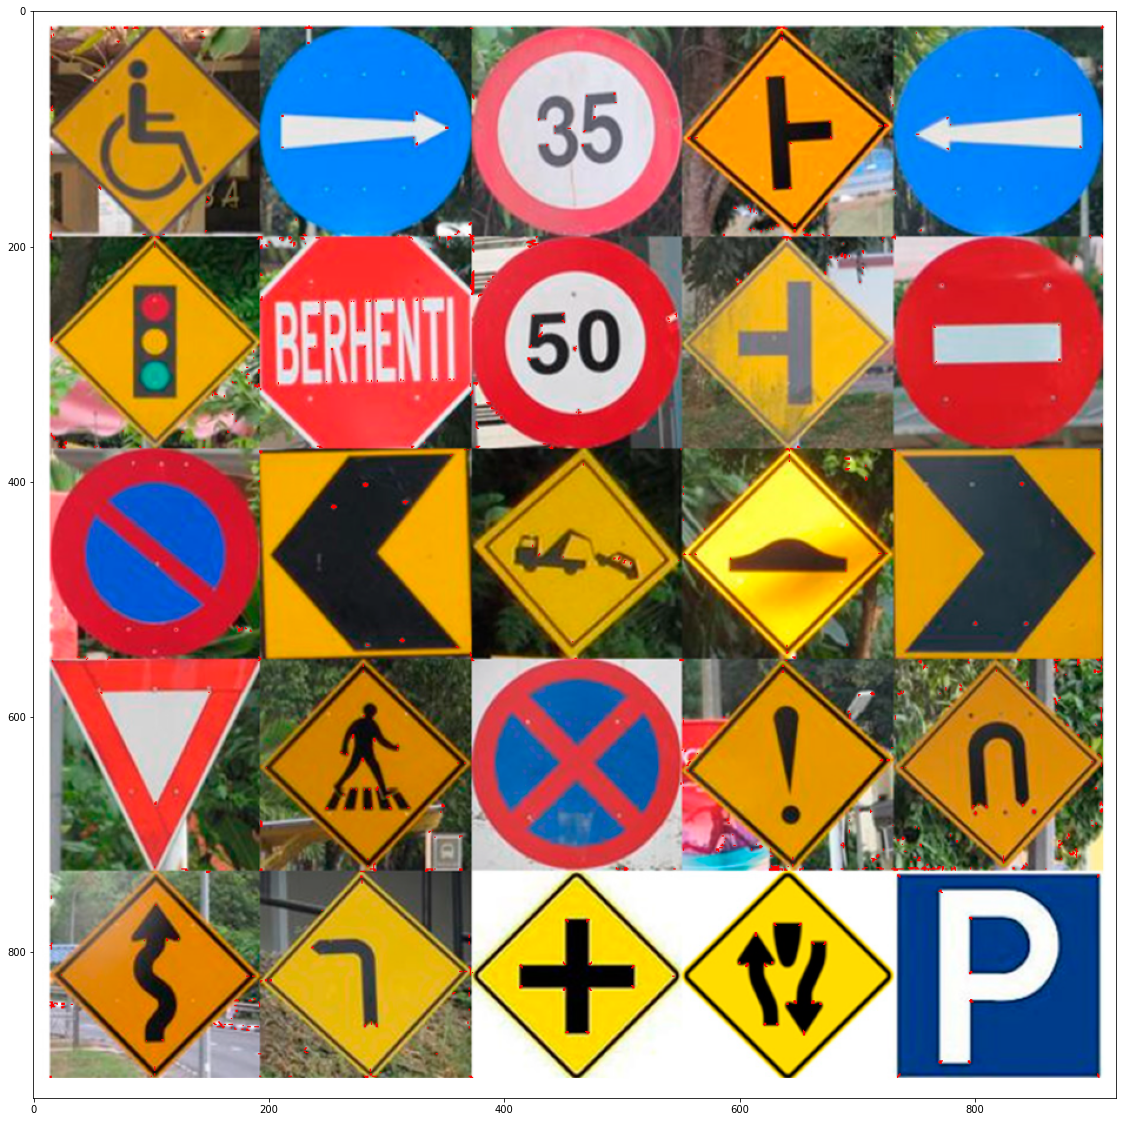

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image_org = np.float32(gray_image)
gray_image = gray_image.copy()
corners = cv2.cornerHarris(
    gray_image, 
    blockSize = 3, 
    ksize = 3, 
    k = 0.09
)

image[corners > 0.015*corners.max() ] = [0, 0, 255]
plt.figure(figsize=(20, 20))
plot_cv2(image)

#### metoda SIFT

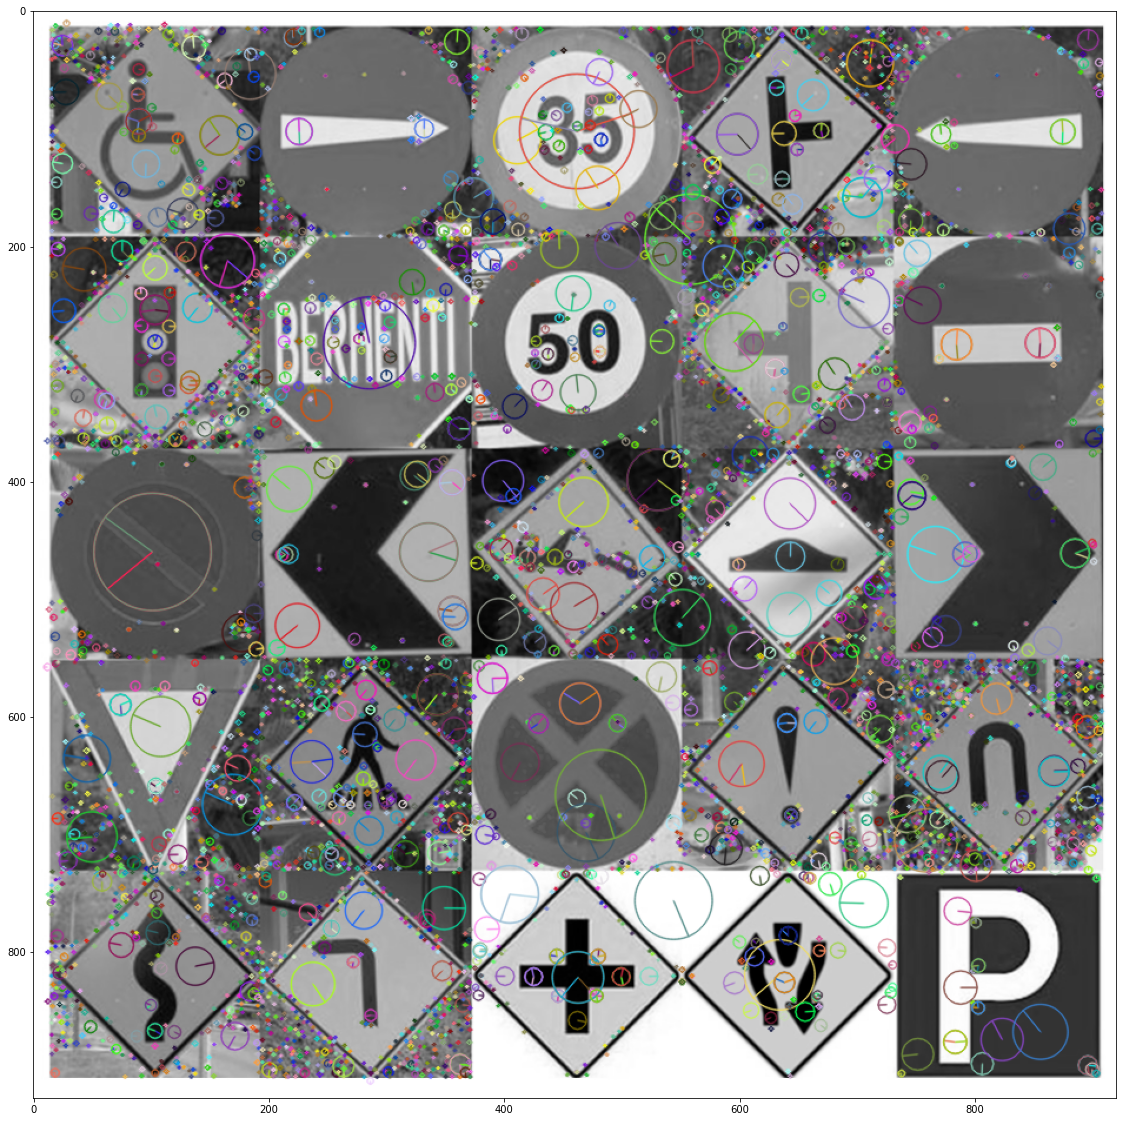

In [4]:
image = image_org.copy()
gray_image = gray_image.copy()
sift = cv2.SIFT_create()

key_points = sift.detect(gray_image, mask = None)

img = cv2.drawKeypoints(
    gray_image, 
    keypoints = key_points, 
    outImage = image, 
    flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(20, 20))
plot_cv2(img)

#### metoda SURF

In [5]:
try:
    image = image_org.copy()
    gray_image = gray_image.copy()

    # Create SURF object. You can specify params here or later.
    # Here I set Hessian Threshold to 400
    surf = cv2.xfeatures2d.SURF_create(400)
except Exception as e:
    print(e)

OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'



#### metoda FAST

Threshold: 70
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 387


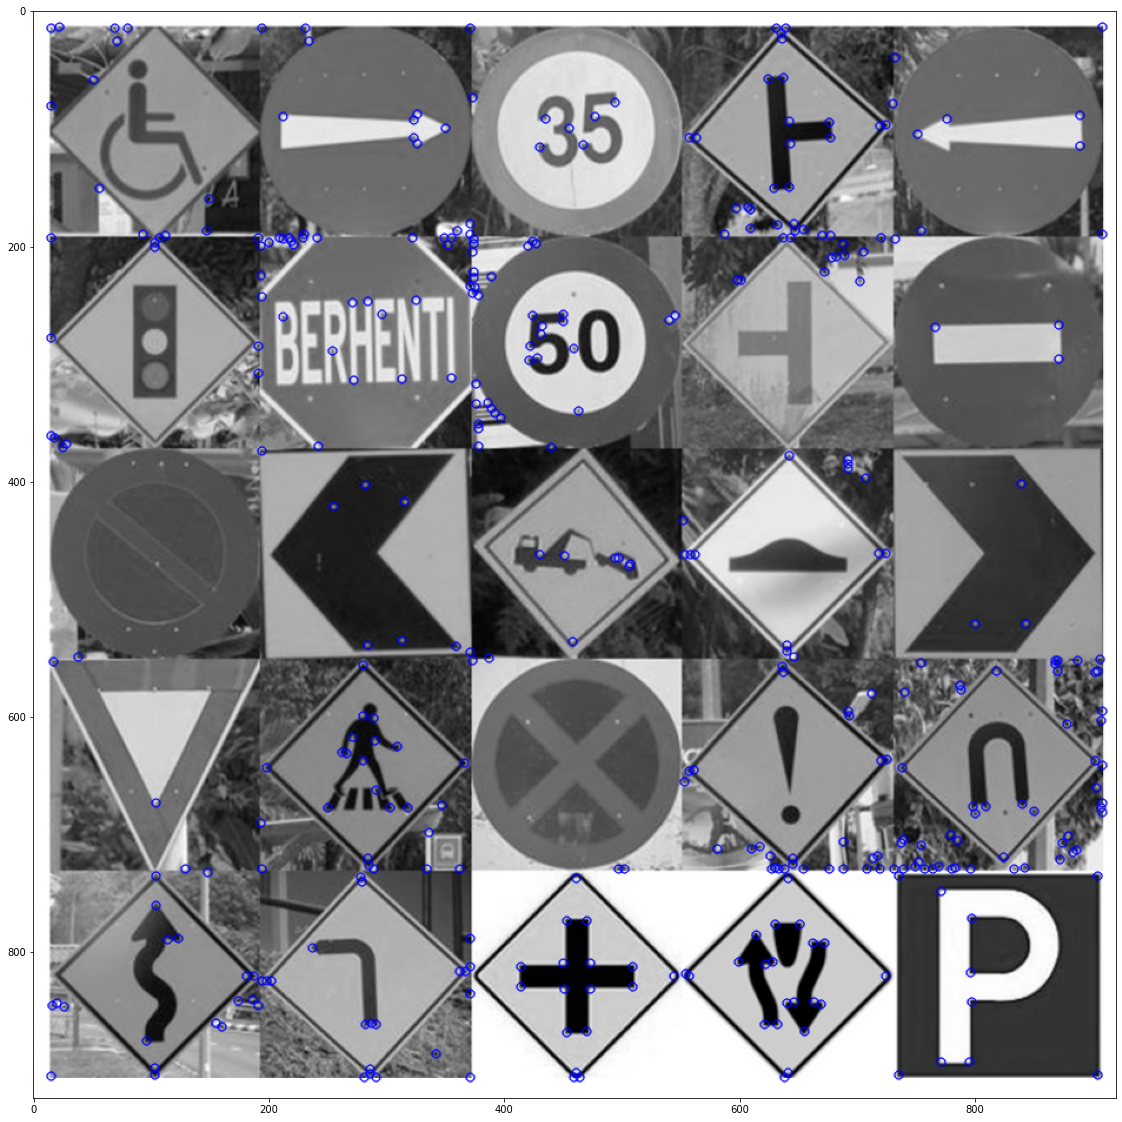

In [6]:
image = image_org.copy()
gray_image = gray_image.copy()
fast = cv2.FastFeatureDetector_create(70)
key_points = fast.detect(gray_image, mask = None)

cv2.drawKeypoints(
    gray_image, 
    keypoints = key_points, 
    outImage = image, 
    color = (255, 0, 0),
    flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

print(f"Threshold: {fast.getThreshold()}")
print(f"nonmaxSuppression:{fast.getNonmaxSuppression()}")
print(f"neighborhood: {fast.getType()}")
print(f"Total Keypoints with nonmaxSuppression: {len(key_points)}")

plt.figure(figsize=(20, 20))
plot_cv2(image)

#### metoda ORB

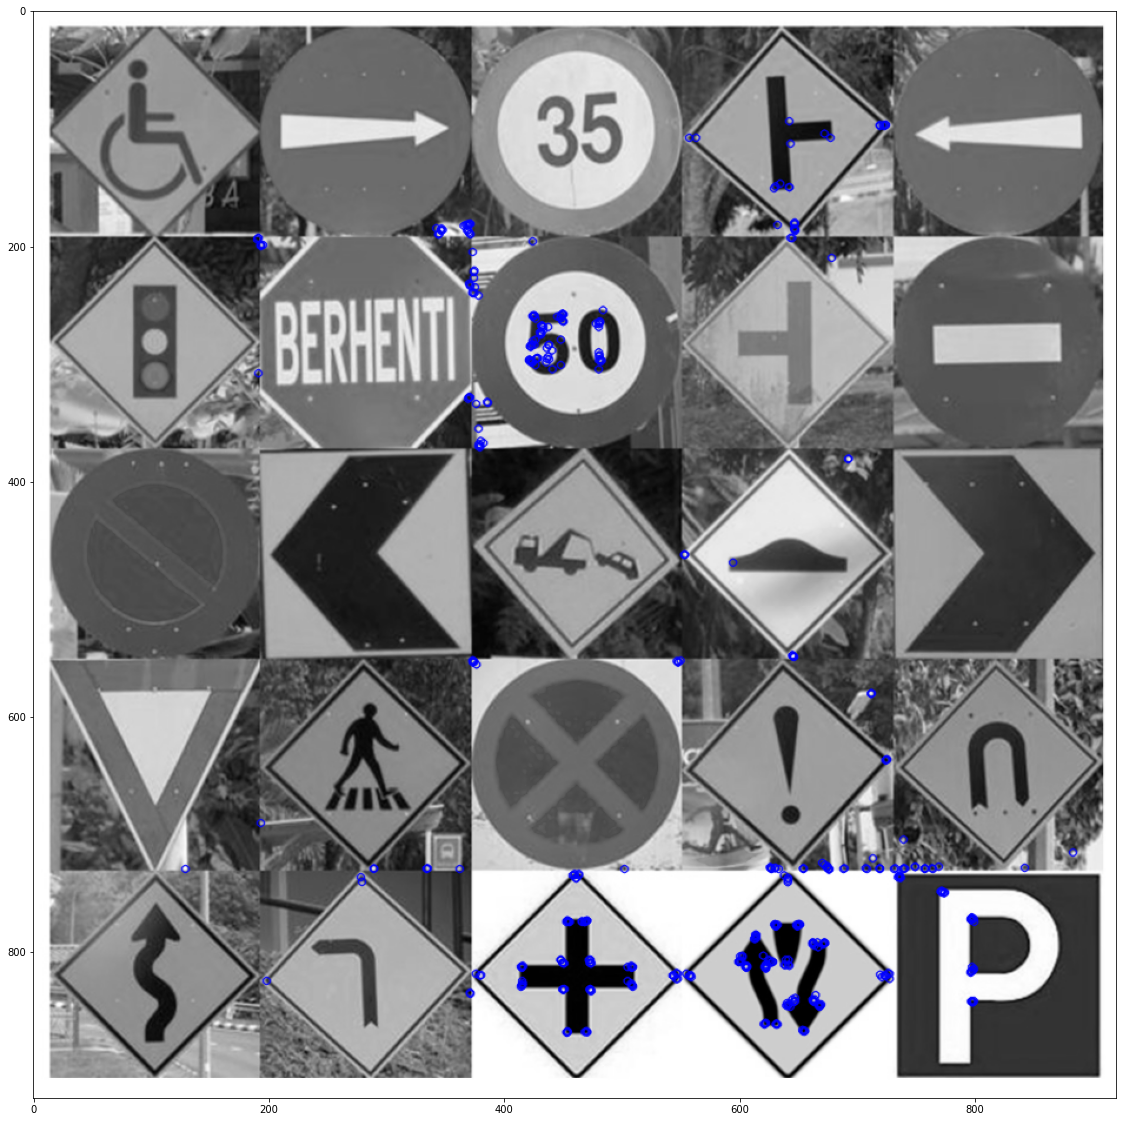

In [7]:
image = image_org.copy()
gray_image = gray_image.copy()

orb = cv2.ORB_create()

key_points = orb.detect(gray_image, mask = None)

key_points, descriptors = orb.compute(image, key_points)

cv2.drawKeypoints(
    gray_image, 
    keypoints = key_points, 
    outImage = image, 
    color = (255, 0, 0)
)

plt.figure(figsize=(20, 20))
plot_cv2(image)

---

### Proszę spróbować wykryć twarz w sekwencji wideo – nagranej na kamerze lub ściągniętej z serwisu youtube. 

W tym celu korzystamy z kaskady Haara:
`cv2.CascadeClassifier('haarcascade_frontalface_default.xml')`

a następnie np. z
`detectMultiScale(gray, 1.1, 4)`

(*eleganckim zwyczajem jest przy tym zakreślenie twarzy odpowiednią ramką `cv2.rectangle/cv2.circle/cv2.ellipse`*)

In [8]:
video = cv2.VideoCapture('ajayii.mp4')

https://www.youtube.com/watch?v=hZbjn_Vuvrc&ab_channel=AJayII

In [9]:
width = int(video.get(3))
height = int(video.get(4))
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
video_face_name = 'lab7_haar.mp4'
video_face = cv2.VideoWriter(
    video_face_name, 
    fourcc = fourcc, 
    fps = 20.0, 
    frameSize = (width, height)
)
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)
i = 0
try:
    while video.isOpened():
        ret, frame = video.read()
        if not ret:
            break
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(
            frame_gray, 
            scaleFactor = 1.1, 
            minNeighbors = 6
        )
        for (x,y,w,h) in faces:
            cv2.rectangle(
                frame,
                pt1 = (x,y),
                pt2 = (x+w,y+h),
                color = (255, 0, 0),
                thickness = 2
            )
        video_face.write(frame)
except Exception as e:
    raise e
finally:
    video.release()
    video_face.release()

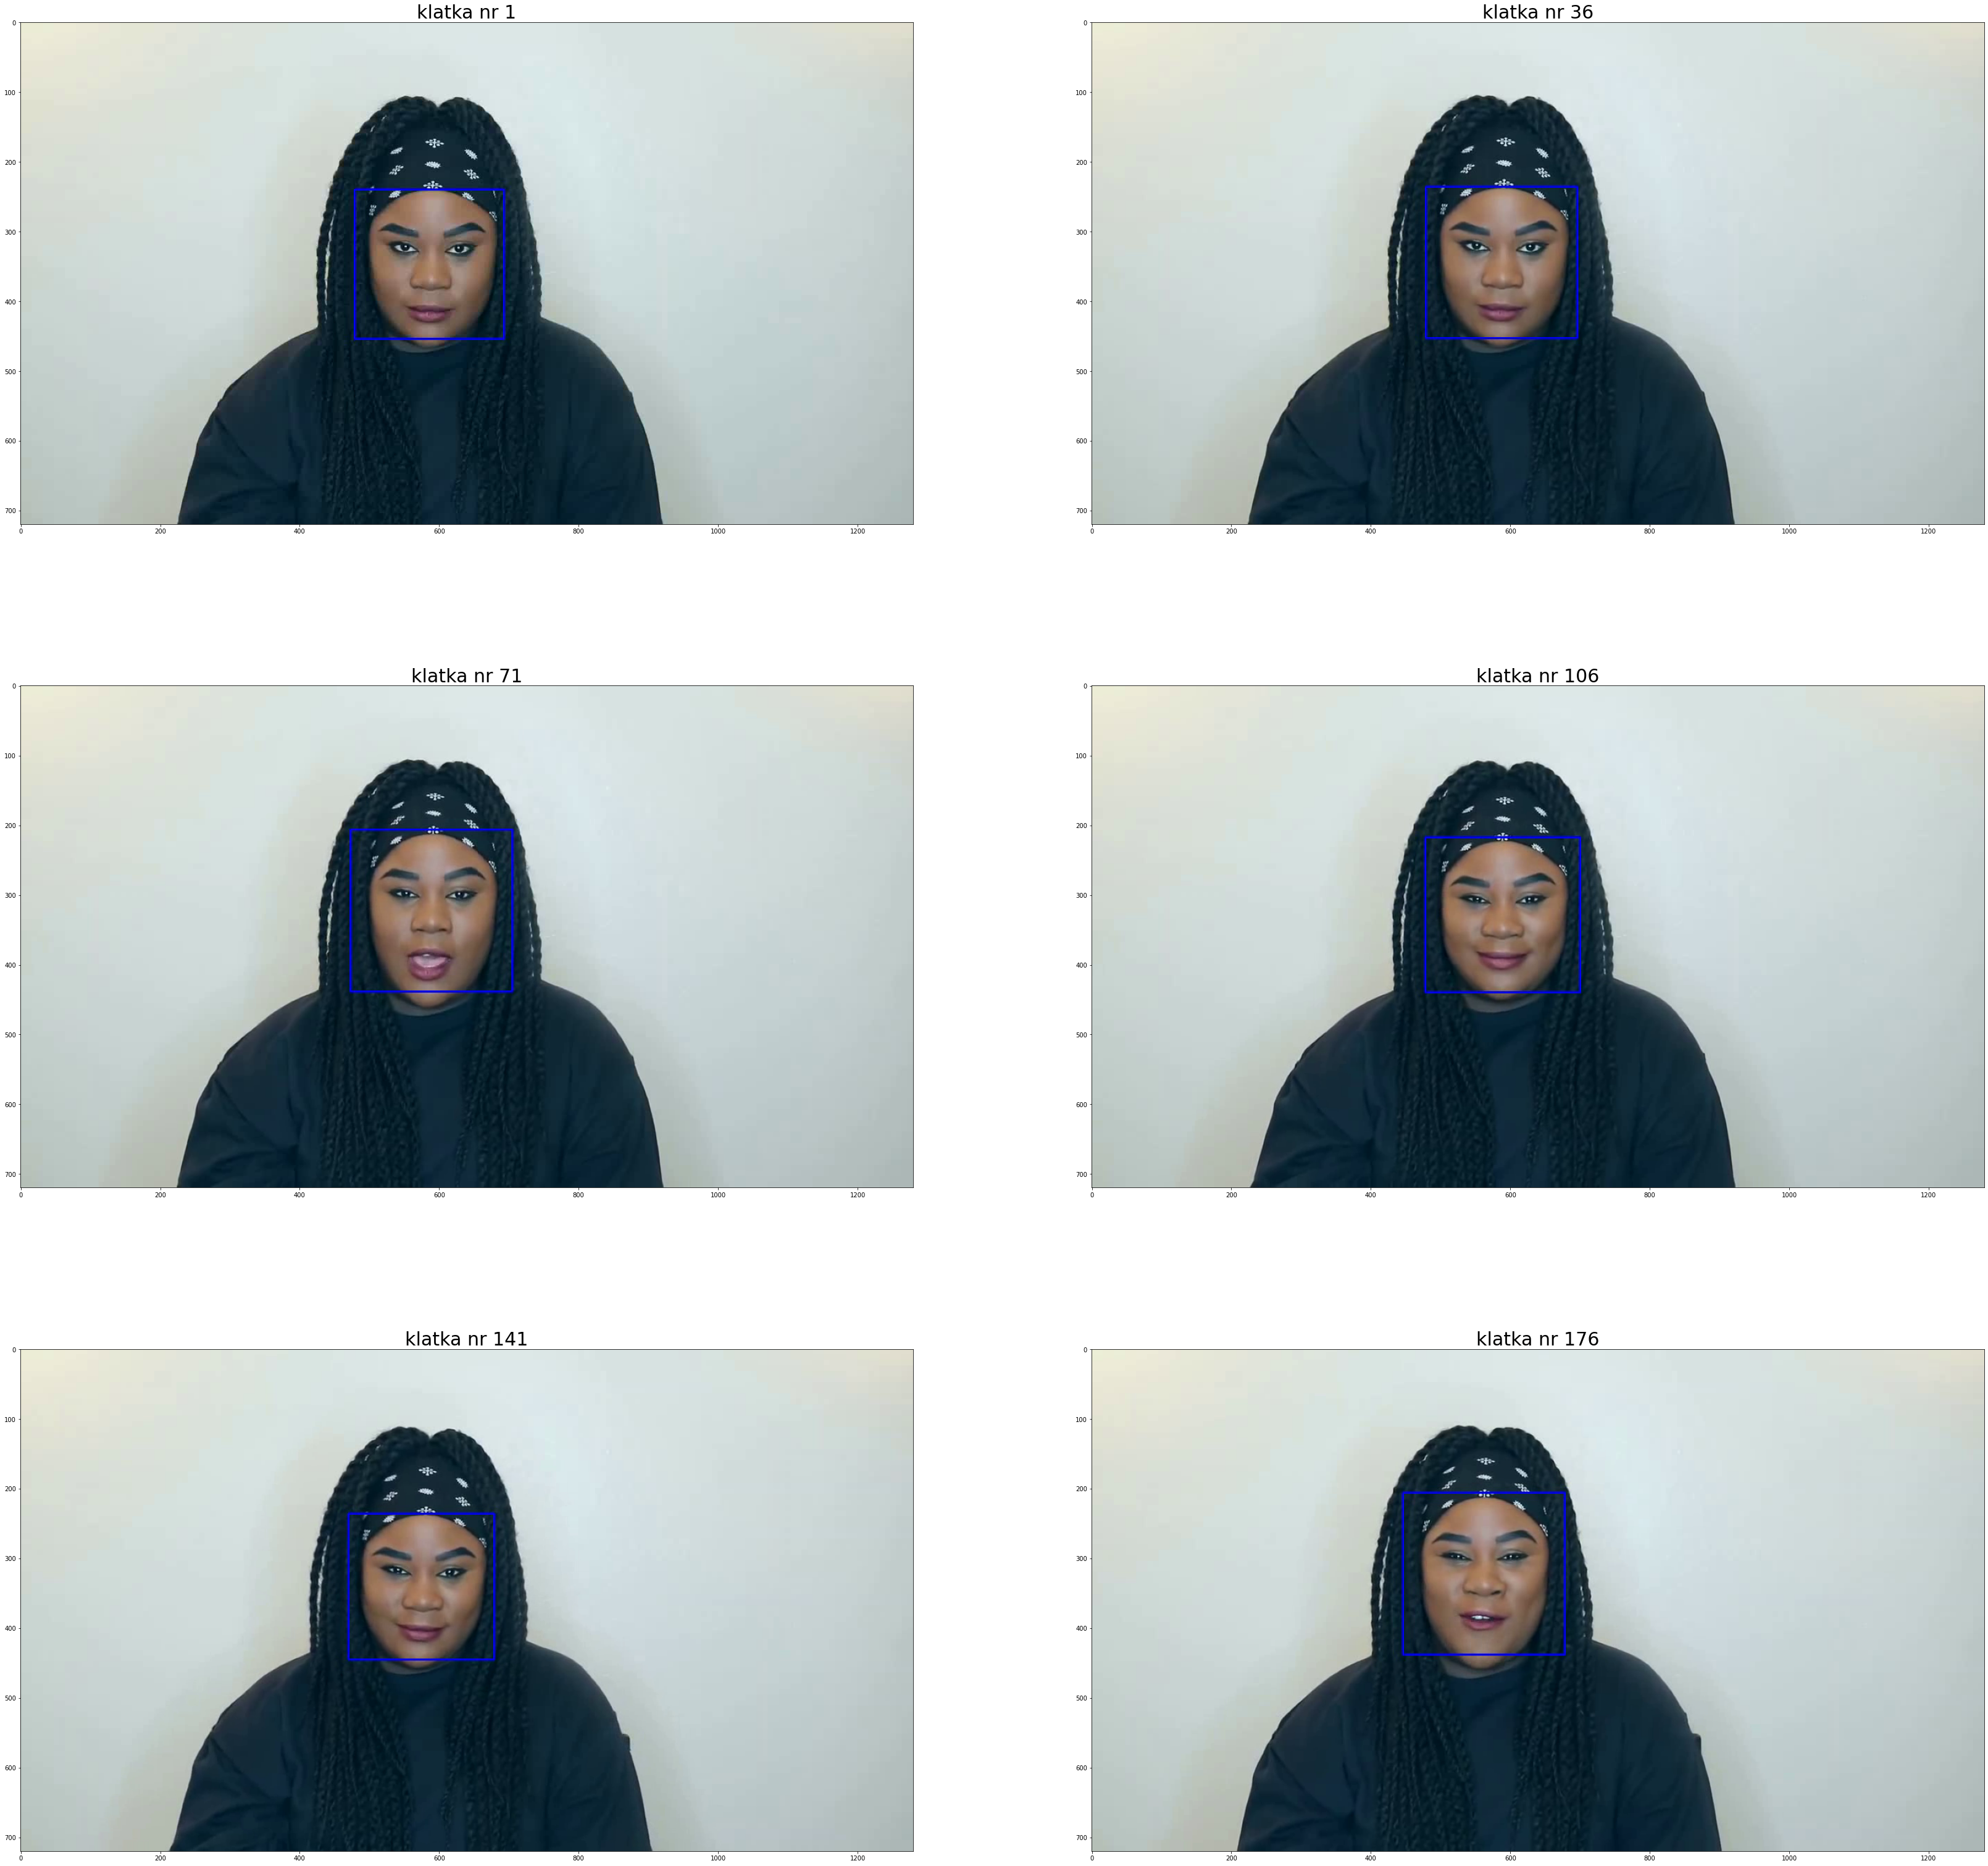

In [10]:
video_face = cv2.VideoCapture(video_face_name)
frames = []
while video_face.isOpened():
    ret, frame = video_face.read()
    if not ret:
        break
    frames.append(frame)
video_face.release()

f = plt.figure(1, figsize=(3*19, 2*28))
_i = 1
step = len(frames)//5 - 3
for i in range(0, len(frames), step):
    ax = f.add_subplot(3, 2, _i)
    ax.set_title(f"klatka nr {i+1}", fontsize=30)
    plot_cv2(frames[i])
    _i += 1